# Business Data Fundamentals for AI Applications

This notebook demonstrates key concepts about data and datasets in a business context, using a retail business scenario. It's designed for business professionals learning about AI and data science.

## Contents
1. Understanding Business Data Types
2. Data Quality Assessment and Preprocessing
3. Handling Missing Data
4. Dataset Splitting for Business Analytics
5. Feature Engineering for Business Insights
6. Database Fundamentals for Business
7. Final Coding Challenge: Customer Segmentation

## Prerequisites
- Basic Python knowledge
- Understanding of business operations
- Familiarity with data concepts

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

def print_section(title):
    """Helper function to print formatted section titles"""
    print("\n" + "="*80)
    print(f" {title} ")
    print("="*80 + "\n")

## 1. Understanding Business Data Types

In business applications, we encounter three main types of data:
1. **Structured Data**: Organized data in tables/databases
2. **Semi-structured Data**: Partially organized data (e.g., JSON, XML)
3. **Unstructured Data**: Free-form data (text, images, etc.)

Let's look at examples of each type using retail business data:

In [2]:
print_section("SECTION 1: UNDERSTANDING BUSINESS DATA TYPES")

# Create example data for a retail business
print("Creating sample retail business data...")

# Structured data example: Customer purchase records
structured_data = pd.DataFrame({
    'customer_id': [1001, 1002, 1003, 1004],
    'purchase_amount': [150.50, 200.75, 75.25, 300.00],
    'items_bought': [3, 4, 1, 5],
    'is_member': [True, False, True, True]
})

print("\nStructured Data Example (Customer Purchase Records):")
print(structured_data)

# Semi-structured data example: Customer feedback in JSON format
semi_structured_data = [
    {'customer_id': 1001, 'rating': 4, 'comments': 'Good service', 'tags': ['friendly', 'fast']},
    {'customer_id': 1002, 'rating': 5, 'comments': 'Excellent products', 'tags': ['quality', 'variety']}
]

print("\nSemi-structured Data Example (Customer Feedback):")
for review in semi_structured_data:
    print(review)

# Unstructured data example: Customer service notes
unstructured_data = """
Customer called regarding product return.
Very satisfied with service but product didn't meet expectations.
Offered 10% discount on next purchase.
"""

print("\nUnstructured Data Example (Customer Service Notes):")
print(unstructured_data)


 SECTION 1: UNDERSTANDING BUSINESS DATA TYPES 

Creating sample retail business data...

Structured Data Example (Customer Purchase Records):
   customer_id  purchase_amount  items_bought  is_member
0         1001           150.50             3       True
1         1002           200.75             4      False
2         1003            75.25             1       True
3         1004           300.00             5       True

Semi-structured Data Example (Customer Feedback):
{'customer_id': 1001, 'rating': 4, 'comments': 'Good service', 'tags': ['friendly', 'fast']}
{'customer_id': 1002, 'rating': 5, 'comments': 'Excellent products', 'tags': ['quality', 'variety']}

Unstructured Data Example (Customer Service Notes):

Customer called regarding product return.
Very satisfied with service but product didn't meet expectations.
Offered 10% discount on next purchase.



### Reflection Questions
1. Which type of data would be most valuable for predicting customer churn?
2. How might combining different data types improve business insights?

## 2. Data Quality Assessment and Preprocessing

Data quality is crucial for accurate business analytics. Common issues include:
- Missing values
- Incorrect values (e.g., negative quantities)
- Inconsistent categories

Let's examine and clean some problematic sales data:

In [3]:
print_section("SECTION 2: DATA QUALITY ASSESSMENT AND PREPROCESSING")

# Create sample sales data with quality issues
sales_data = pd.DataFrame({
    'date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
    'product_id': ['A001', 'B002', 'A001', 'C003', 'B002'],
    'quantity': [10, -5, 15, 0, 8],
    'price': [99.99, 149.99, 99.99, 199.99, 150.00],
    'customer_segment': ['Premium', 'Basic', 'Unknown', 'Premium', 'Basic']
})

print("\nOriginal Sales Data:")
print(sales_data)

# Check for data quality issues
print("\nData Quality Assessment:")
print(f"1. Missing values: {sales_data.isnull().sum().sum()}")
print(f"2. Negative values in quantity: {(sales_data['quantity'] < 0).sum()}")
print(f"3. Unknown categories: {(sales_data['customer_segment'] == 'Unknown').sum()}")

# Clean the data
cleaned_data = sales_data.copy()
cleaned_data.loc[cleaned_data['quantity'] < 0, 'quantity'] = 0
cleaned_data['customer_segment'] = cleaned_data['customer_segment'].replace('Unknown', 'Basic')

print("\nCleaned Sales Data:")
print(cleaned_data)


 SECTION 2: DATA QUALITY ASSESSMENT AND PREPROCESSING 


Original Sales Data:
         date product_id  quantity   price customer_segment
0  2024-01-01       A001        10   99.99          Premium
1  2024-01-02       B002        -5  149.99            Basic
2  2024-01-03       A001        15   99.99          Unknown
3  2024-01-04       C003         0  199.99          Premium
4  2024-01-05       B002         8  150.00            Basic

Data Quality Assessment:
1. Missing values: 0
2. Negative values in quantity: 1
3. Unknown categories: 1

Cleaned Sales Data:
         date product_id  quantity   price customer_segment
0  2024-01-01       A001        10   99.99          Premium
1  2024-01-02       B002         0  149.99            Basic
2  2024-01-03       A001        15   99.99            Basic
3  2024-01-04       C003         0  199.99          Premium
4  2024-01-05       B002         8  150.00            Basic


### Reflection Questions
1. What business impact could negative quantity values have on analysis?
2. How would you handle 'Unknown' values in a real business scenario?

## 3. Handling Missing Data

Missing data is common in business datasets and can significantly impact analysis. Let's explore different approaches to handling missing values:

In [4]:
print_section("SECTION 3: HANDLING MISSING DATA")

# Create customer data with missing values
customer_data = pd.DataFrame({
    'customer_id': range(1001, 1006),
    'age': [35, np.nan, 45, 28, np.nan],
    'total_purchases': [1200, 800, np.nan, 1500, 950],
    'loyalty_years': [3, 2, 4, np.nan, 1]
})

print("\nCustomer Data with Missing Values:")
print(customer_data)

# Analyze missing data
print("\nMissing Data Analysis:")
print(customer_data.isnull().sum())

# Handle missing data using mean imputation
customer_data['age'].fillna(customer_data['age'].mean(), inplace=True)
customer_data['total_purchases'].fillna(customer_data['total_purchases'].mean(), inplace=True)
customer_data['loyalty_years'].fillna(customer_data['loyalty_years'].mean(), inplace=True)

print("\nCustomer Data After Handling Missing Values:")
print(customer_data)


 SECTION 3: HANDLING MISSING DATA 


Customer Data with Missing Values:
   customer_id   age  total_purchases  loyalty_years
0         1001  35.0           1200.0            3.0
1         1002   NaN            800.0            2.0
2         1003  45.0              NaN            4.0
3         1004  28.0           1500.0            NaN
4         1005   NaN            950.0            1.0

Missing Data Analysis:
customer_id        0
age                2
total_purchases    1
loyalty_years      1
dtype: int64

Customer Data After Handling Missing Values:
   customer_id   age  total_purchases  loyalty_years
0         1001  35.0           1200.0            3.0
1         1002  36.0            800.0            2.0
2         1003  45.0           1112.5            4.0
3         1004  28.0           1500.0            2.5
4         1005  36.0            950.0            1.0


### Reflection Questions
1. What are the pros and cons of using mean imputation for missing values?
2. How might missing data affect customer segmentation analysis?

## 4. Dataset Splitting for Business Analytics

When building predictive models, it's crucial to properly split data into training and testing sets. Let's demonstrate this using customer churn prediction as an example:

In [5]:
print_section("SECTION 4: DATASET SPLITTING FOR BUSINESS ANALYTICS")

# Create sample customer churn data
np.random.seed(42)
n_customers = 1000

churn_data = pd.DataFrame({
    'usage_frequency': np.random.normal(10, 3, n_customers),
    'support_calls': np.random.poisson(2, n_customers),
    'tenure_months': np.random.randint(1, 60, n_customers),
    'monthly_charges': np.random.uniform(50, 150, n_customers),
    'churned': np.random.choice([0, 1], n_customers, p=[0.8, 0.2])
})

print("\nSample of Customer Churn Data:")
print(churn_data.head())

# Split the data
X = churn_data.drop('churned', axis=1)
y = churn_data['churned']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nDataset Splitting Results:")
print(f"Training set size: {len(X_train)} customers")
print(f"Test set size: {len(X_test)} customers")
print(f"Churn rate in training set: {y_train.mean():.2%}")
print(f"Churn rate in test set: {y_test.mean():.2%}")


 SECTION 4: DATASET SPLITTING FOR BUSINESS ANALYTICS 


Sample of Customer Churn Data:
   usage_frequency  support_calls  tenure_months  monthly_charges  churned
0        11.490142              1             58        97.815892        0
1         9.585207              2             26       126.796998        0
2        11.943066              1             23       112.856640        0
3        14.569090              5             26       113.326320        0
4         9.297540              1             45        95.028248        0

Dataset Splitting Results:
Training set size: 800 customers
Test set size: 200 customers
Churn rate in training set: 19.88%
Churn rate in test set: 16.50%


### Reflection Questions
1. Why is it important to maintain similar churn rates in train and test sets?
2. How would you handle highly imbalanced classes in churn prediction?

## 5. Feature Engineering for Business Insights

Feature engineering is the process of creating new meaningful features from existing data. Let's create customer-level features from transaction data:

In [6]:
print_section("SECTION 5: FEATURE ENGINEERING FOR BUSINESS INSIGHTS")

# Create sample transaction data
transactions = pd.DataFrame({
    'customer_id': np.repeat(range(1001, 1004), 5),
    'transaction_date': pd.date_range(start='2024-01-01', periods=15, freq='D'),
    'amount': np.random.uniform(50, 500, 15)
})

print("\nOriginal Transaction Data:")
print(transactions)

# Feature engineering
customer_features = transactions.groupby('customer_id').agg({
    'amount': ['mean', 'sum', 'count'],
    'transaction_date': ['min', 'max']
}).reset_index()

customer_features.columns = ['customer_id', 'avg_amount', 'total_spend', 
                           'transaction_count', 'first_purchase', 'last_purchase']

customer_features['customer_age_days'] = (
    customer_features['last_purchase'] - customer_features['first_purchase']
).dt.days

customer_features['avg_transaction_frequency'] = (
    customer_features['transaction_count'] / 
    customer_features['customer_age_days']
)

print("\nEngineered Customer Features:")
print(customer_features)


 SECTION 5: FEATURE ENGINEERING FOR BUSINESS INSIGHTS 


Original Transaction Data:
    customer_id transaction_date      amount
0          1001       2024-01-01  360.420662
1          1001       2024-01-02  321.098499
2          1001       2024-01-03   98.261075
3          1001       2024-01-04  278.675963
4          1001       2024-01-05  380.965275
5          1002       2024-01-06  496.433644
6          1002       2024-01-07  333.116075
7          1002       2024-01-08  216.631880
8          1002       2024-01-09  151.768220
9          1002       2024-01-10  442.773605
10         1003       2024-01-11  416.554345
11         1003       2024-01-12  155.265269
12         1003       2024-01-13  140.284441
13         1003       2024-01-14  371.811550
14         1003       2024-01-15  191.728428

Engineered Customer Features:
   customer_id  avg_amount  total_spend  transaction_count first_purchase  \
0         1001  287.884295  1439.421474                  5     2024-01-01   
1         

### Reflection Questions
1. Which engineered features might be most predictive of customer value?
2. What additional features could be created from this data?

## 6. Database Fundamentals for Business

Understanding database concepts is crucial for business analytics. Let's explore a simple retail database system:

In [7]:
print_section("SECTION 6: DATABASE FUNDAMENTALS FOR BUSINESS")

# Create example tables for a simple retail database
products = pd.DataFrame({
    'product_id': ['P001', 'P002', 'P003', 'P004'],
    'name': ['Laptop', 'Smartphone', 'Tablet', 'Headphones'],
    'category': ['Electronics', 'Electronics', 'Electronics', 'Accessories'],
    'price': [1200.00, 800.00, 500.00, 100.00],
    'stock': [50, 100, 75, 200]
})

customers = pd.DataFrame({
    'customer_id': ['C001', 'C002', 'C003'],
    'name': ['John Smith', 'Jane Doe', 'Bob Wilson'],
    'email': ['john@email.com', 'jane@email.com', 'bob@email.com'],
    'join_date': ['2024-01-01', '2024-01-15', '2024-02-01']
})

orders = pd.DataFrame({
    'order_id': ['O001', 'O002', 'O003', 'O004'],
    'customer_id': ['C001', 'C002', 'C001', 'C003'],
    'product_id': ['P001', 'P002', 'P003', 'P001'],
    'quantity': [1, 2, 1, 1],
    'order_date': ['2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04']
})

print("Database Tables:")
print("\nProducts:")
print(products)
print("\nCustomers:")
print(customers)
print("\nOrders:")
print(orders)

# Database operations
print("\nDatabase Operations Examples:")

# 1. Filtering
print("\n1. Expensive Products (>$500):")
print(products[products['price'] > 500])

# 2. Joining
print("\n2. Orders with Customer Names:")
print(pd.merge(orders, customers[['customer_id', 'name']], on='customer_id'))

# 3. Aggregation
print("\n3. Orders per Customer:")
print(orders.groupby('customer_id').size())


 SECTION 6: DATABASE FUNDAMENTALS FOR BUSINESS 

Database Tables:

Products:
  product_id        name     category   price  stock
0       P001      Laptop  Electronics  1200.0     50
1       P002  Smartphone  Electronics   800.0    100
2       P003      Tablet  Electronics   500.0     75
3       P004  Headphones  Accessories   100.0    200

Customers:
  customer_id        name           email   join_date
0        C001  John Smith  john@email.com  2024-01-01
1        C002    Jane Doe  jane@email.com  2024-01-15
2        C003  Bob Wilson   bob@email.com  2024-02-01

Orders:
  order_id customer_id product_id  quantity  order_date
0     O001        C001       P001         1  2024-02-01
1     O002        C002       P002         2  2024-02-02
2     O003        C001       P003         1  2024-02-03
3     O004        C003       P001         1  2024-02-04

Database Operations Examples:

1. Expensive Products (>$500):
  product_id        name     category   price  stock
0       P001      Laptop

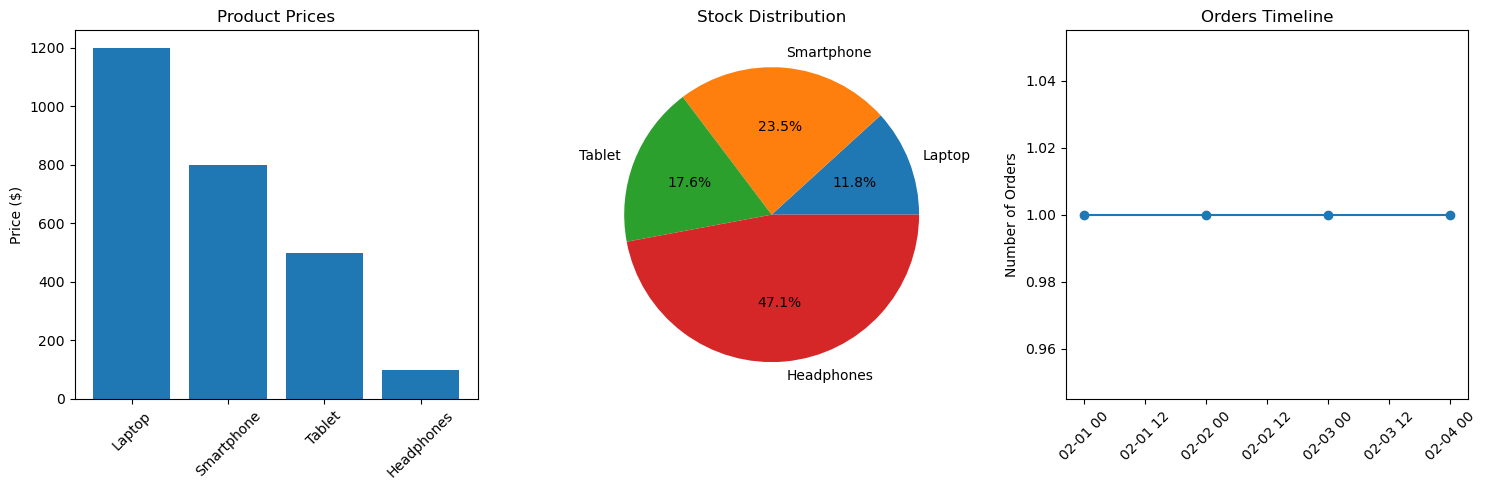

In [8]:
# Create database visualizations
plt.figure(figsize=(15, 5))

# 1. Product Prices
plt.subplot(131)
plt.bar(products['name'], products['price'])
plt.title('Product Prices')
plt.xticks(rotation=45)
plt.ylabel('Price ($)')

# 2. Stock Levels
plt.subplot(132)
plt.pie(products['stock'], labels=products['name'], autopct='%1.1f%%')
plt.title('Stock Distribution')

# 3. Orders Timeline
plt.subplot(133)
order_counts = pd.to_datetime(orders['order_date']).value_counts().sort_index()
plt.plot(order_counts.index, order_counts.values, marker='o')
plt.title('Orders Timeline')
plt.xticks(rotation=45)
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

### Database Schema
```
Products Table                 Customers Table
+-------------+-------+       +-------------+-------+
| product_id  | PK    |       | customer_id | PK    |
| name        |       |       | name        |       |
| category    |       |       | email       |       |
| price       |       |       | join_date   |       |
| stock       |       |       +-------------+-------+
+-------------+-------+               ↑
      ↑                              |
      |                              |
      |         Orders Table         |
      |    +-------------+-------+   |
      +----| product_id  | FK    |   |
           | customer_id | FK    |---+
           | order_id    | PK    |
           | quantity    |       |
           | order_date  |       |
           +-------------+-------+
```

### Reflection Questions
1. How does a relational database structure help maintain data integrity?
2. What business insights can be derived from joining different tables?
3. How might this database schema evolve as the business grows?

## 7. Final Coding Challenge: Customer Segmentation

Now it's your turn to apply what you've learned! Complete the customer segmentation challenge below:

### Challenge: Create a Basic Customer Segmentation System

Your task is to create a simple customer segmentation system based on:
1. Total spending
2. Transaction frequency
3. Average transaction amount

**Requirements:**
1. Use the provided transaction data
2. Create customer-level features
3. Segment customers into 3 tiers: 'High Value', 'Medium Value', 'Low Value'
4. Print the number of customers in each segment
5. Calculate average metrics for each segment

**Success Criteria:**
1. Code runs without errors
2. All required features are calculated correctly
3. Segments are created using logical thresholds
4. Output includes segment sizes and average metrics
5. Code includes clear comments explaining the process

In [9]:
def segment_customers(transactions):
    '''
    Segments customers based on their transaction patterns.
    
    Parameters:
        transactions: DataFrame with columns [customer_id, transaction_date, amount]
    
    Returns:
        DataFrame with customer segments and metrics
    '''
    # Step 1: Calculate customer-level metrics
    # TODO: Group by customer_id and calculate:
    # - total_spend
    # - transaction_count
    # - avg_transaction
    
    # Step 2: Create segments
    # TODO: Add segment column based on total_spend:
    # - High Value: Top 20%
    # - Medium Value: Middle 40%
    # - Low Value: Bottom 40%
    
    # Step 3: Calculate segment metrics
    # TODO: Calculate average metrics for each segment
    
    return customer_segments

# Test data
test_transactions = pd.DataFrame({
    'customer_id': np.repeat(range(1001, 1021), 5),
    'transaction_date': pd.date_range(start='2024-01-01', periods=100, freq='D'),
    'amount': np.random.uniform(50, 500, 100)
})

# Your code here
